In [ ]:
import yfinance as yf

tsla = yf.Ticker("TSLA")
tsla_hist = tsla.history(period="max")

In [ ]:
import os
import pandas as pd
import numpy as np

DATA_PATH = "tsla_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        tsla_hist = pd.read_json(DATA_PATH)
else:
    tsla = yf.Ticker("TSLA")
    tsla_hist = tsla.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    tsla_hist.to_json(DATA_PATH)

In [ ]:
tsla_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2010-06-29 04:00:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0
2010-06-30 04:00:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0
2010-07-01 04:00:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0
2010-07-02 04:00:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0
2010-07-06 04:00:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0
...,...,...,...,...,...,...,...
2023-12-07 05:00:00,241.550003,244.080002,236.979996,242.639999,107142300,0,0
2023-12-08 05:00:00,240.270004,245.270004,239.270004,243.839996,102980100,0,0
2023-12-11 05:00:00,242.740005,243.440002,237.449997,239.740005,97913900,0,0
2023-12-12 05:00:00,238.550003,238.990005,233.869995,237.009995,95328300,0,0


In [ ]:
tsla_hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2010-06-29 04:00:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0
2010-06-30 04:00:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0
2010-07-01 04:00:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0
2010-07-02 04:00:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0
2010-07-06 04:00:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0
2010-07-07 04:00:00,1.093333,1.108667,0.998667,1.053333,103825500,0,0
2010-07-08 04:00:00,1.076000,1.168000,1.038000,1.164000,115671000,0,0
2010-07-09 04:00:00,1.172000,1.193333,1.103333,1.160000,60759000,0,0
2010-07-12 04:00:00,1.196667,1.204667,1.133333,1.136667,33037500,0,0
2010-07-13 04:00:00,1.159333,1.242667,1.126667,1.209333,40201500,0,0


<Axes: xlabel='Date'>

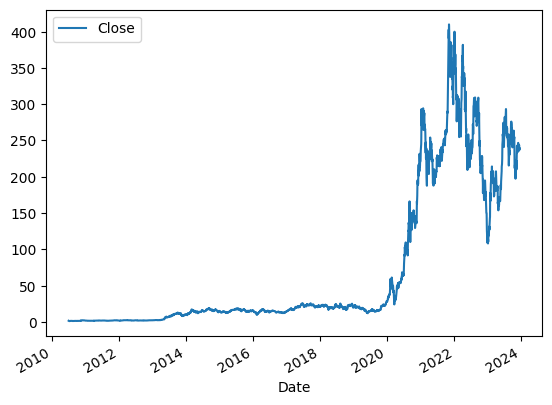

In [ ]:
# Visualize Tesla stock prices
tsla_hist.plot.line(y="Close", use_index=True)

In [ ]:
# Ensure we know the actual closing price
data = tsla_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = tsla_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
data.head(10)

,Actual_Close,Target
2010-06-29 04:00:00,1.592667,NaN
2010-06-30 04:00:00,1.588667,0.0
2010-07-01 04:00:00,1.464000,0.0
2010-07-02 04:00:00,1.280000,0.0
2010-07-06 04:00:00,1.074000,0.0
2010-07-07 04:00:00,1.053333,0.0
2010-07-08 04:00:00,1.164000,1.0
2010-07-09 04:00:00,1.160000,0.0
2010-07-12 04:00:00,1.136667,0.0
2010-07-13 04:00:00,1.209333,1.0


In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
tsla_prev = tsla_hist.copy()
tsla_prev = tsla_prev.shift(1)

In [ ]:
tsla_prev.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2010-06-29 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30 04:00:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0
2010-07-01 04:00:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0
2010-07-02 04:00:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0
2010-07-06 04:00:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0
2010-07-07 04:00:00,1.333333,1.333333,1.055333,1.074000,103003500.0,0.0,0.0
2010-07-08 04:00:00,1.093333,1.108667,0.998667,1.053333,103825500.0,0.0,0.0
2010-07-09 04:00:00,1.076000,1.168000,1.038000,1.164000,115671000.0,0.0,0.0
2010-07-12 04:00:00,1.172000,1.193333,1.103333,1.160000,60759000.0,0.0,0.0
2010-07-13 04:00:00,1.196667,1.204667,1.133333,1.136667,33037500.0,0.0,0.0


In [ ]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(tsla_prev[predictors]).iloc[1:]

In [ ]:
data.head(10)

,Actual_Close,Target,Close,Volume,Open,High,Low
2010-06-30 04:00:00,1.588667,0.0,1.592667,281494500.0,1.266667,1.666667,1.169333
2010-07-01 04:00:00,1.464000,0.0,1.588667,257806500.0,1.719333,2.028000,1.553333
2010-07-02 04:00:00,1.280000,0.0,1.464000,123282000.0,1.666667,1.728000,1.351333
2010-07-06 04:00:00,1.074000,0.0,1.280000,77097000.0,1.533333,1.540000,1.247333
2010-07-07 04:00:00,1.053333,0.0,1.074000,103003500.0,1.333333,1.333333,1.055333
2010-07-08 04:00:00,1.164000,1.0,1.053333,103825500.0,1.093333,1.108667,0.998667
2010-07-09 04:00:00,1.160000,0.0,1.164000,115671000.0,1.076000,1.168000,1.038000
2010-07-12 04:00:00,1.136667,0.0,1.160000,60759000.0,1.172000,1.193333,1.103333
2010-07-13 04:00:00,1.209333,1.0,1.136667,33037500.0,1.196667,1.204667,1.133333
2010-07-14 04:00:00,1.322667,1.0,1.209333,40201500.0,1.159333,1.242667,1.126667


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, mean_squared_error, accuracy_score,mean_absolute_error
import matplotlib.pyplot as plt



In [ ]:
# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.3, random_state=1)

In [ ]:
# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
random_model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [ ]:
# Create base models for stacking classifier
base_models = [
    ("random_forest", RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)),
    ("linear_regression", LinearRegression())
]

In [ ]:
# # Create a stacking classifier model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1))

In [ ]:
# Linear Regression
linear_model = LinearRegression()

In [ ]:
# Create a train and test set to avoid using future data to predict the past.
train = data.iloc[:-100]
test = data.iloc[-100:]

In [ ]:
# Train the random forest model on the training data
random_model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [ ]:
# Train the stacking model on the training data
stacking_model.fit(train[predictors], train["Target"])

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(min_samples_split=200,
                                                       random_state=1)),
                               ('linear_regression', LinearRegression())],
                   final_estimator=RandomForestClassifier(min_samples_split=200,
                                                          random_state=1))

In [ ]:
# Train the linear regression model on the training data
linear_model.fit(train[predictors], train["Target"])

LinearRegression()

In [ ]:
# Evaluate error of predictions for random forest model
random_preds = random_model.predict(test[predictors])
random_preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Make predictions on the test set
stacking_preds = stacking_model.predict(test[predictors])
stacking_preds

array([1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.])

In [ ]:
# Make predictions on the test set
linear_preds = linear_model.predict(test[predictors])
linear_preds_b = (linear_preds > 0.5).astype(int)  # Convert to binary predictions
linear_preds_b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
random_accuracy_score = accuracy_score(test["Target"], random_preds)
print(f"Testing Accuracy Score (Random): {random_accuracy_score*100}")

Testing Accuracy Score (Random): 46.0


In [ ]:
stacking_accuracy_score = accuracy_score(test["Target"], stacking_preds)
print(f"Testing Accuracy Score (Stacking): {stacking_accuracy_score*100}")

Testing Accuracy Score (Stacking): 47.0


In [ ]:
linear_mean_squared_error = mean_squared_error(test["Target"], linear_preds)
print(f"Mean Square Error (Linear): {linear_mean_squared_error}")
linear_mean_absolute_error = mean_absolute_error(test["Target"], linear_preds)
print(f"Mean Absolute Error (Linear): {linear_mean_absolute_error}")

Mean Square Error (Linear): 0.25440277524419525
Mean Absolute Error (Linear): 0.5028505317713082


In [ ]:
random_precision_score = precision_score(test["Target"], random_preds)
print(f"Precision (Random): {random_precision_score}")

Precision (Random): 0.46875


In [ ]:
# Evaluate the stacking model
stacking_precision_score = precision_score(test["Target"], stacking_preds)
print(f"Precision (Stacking): {stacking_precision_score}")

Precision (Stacking): 0.45098039215686275


In [ ]:
# Evaluate the linear regression model
linear_precision_score = precision_score(test["Target"], linear_preds_b)
print(f"Precision (Linear Regression): {linear_precision_score}")

Precision (Linear Regression): 0.48484848484848486


<Axes: >

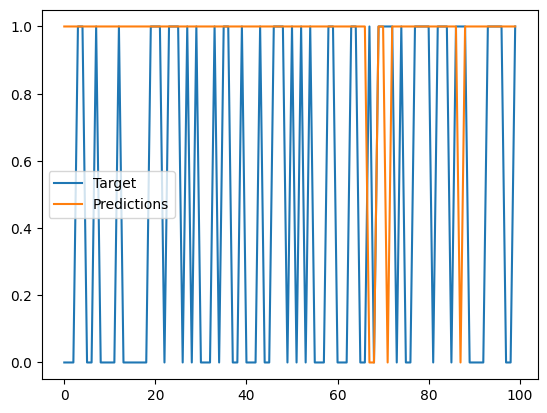

In [ ]:
# Visualize Random Predictions
random_preds_visual = pd.DataFrame({"Target": test["Target"].values, "Predictions": random_preds})
random_preds_visual.plot()

<Axes: >

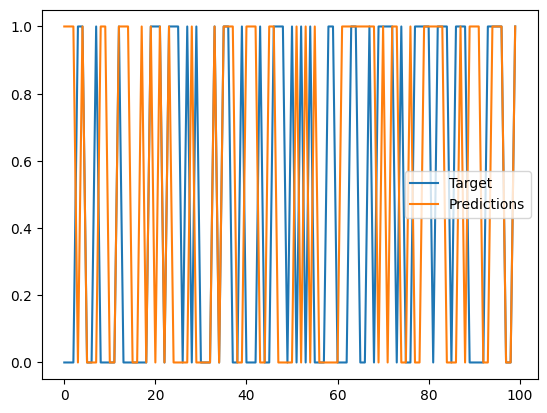

In [ ]:
# Visualize Stacking Predictions
stacking_preds_visual = pd.DataFrame({"Target": test["Target"].values, "Predictions": stacking_preds})
stacking_preds_visual.plot()

<Axes: >

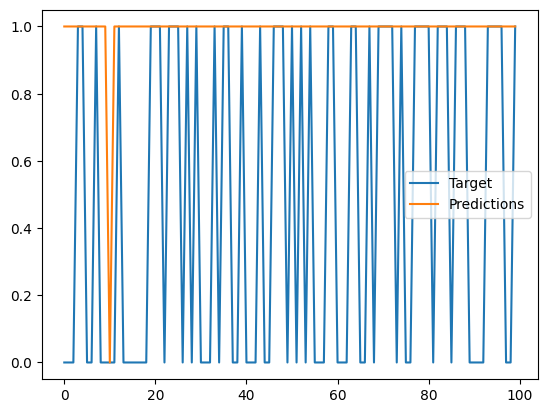

In [ ]:
# Visualize Linear Predictions
linear_preds_visual = pd.DataFrame({"Target": test["Target"].values, "Predictions": linear_preds_b})
linear_preds_visual.plot()

In [ ]:
# Combine predictions
combined_preds = (stacking_preds + linear_preds_b + random_preds) / 3

In [ ]:
# Convert to binary predictions based on a threshold
combined_binary_preds = (combined_preds > 0.5).astype(int)
combined_binary_preds



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Evaluate the combined model
combined_precision_score = precision_score(test["Target"], combined_binary_preds)
print(f"Precision (Combined Model): {combined_precision_score}")

Precision (Combined Model): 0.47959183673469385


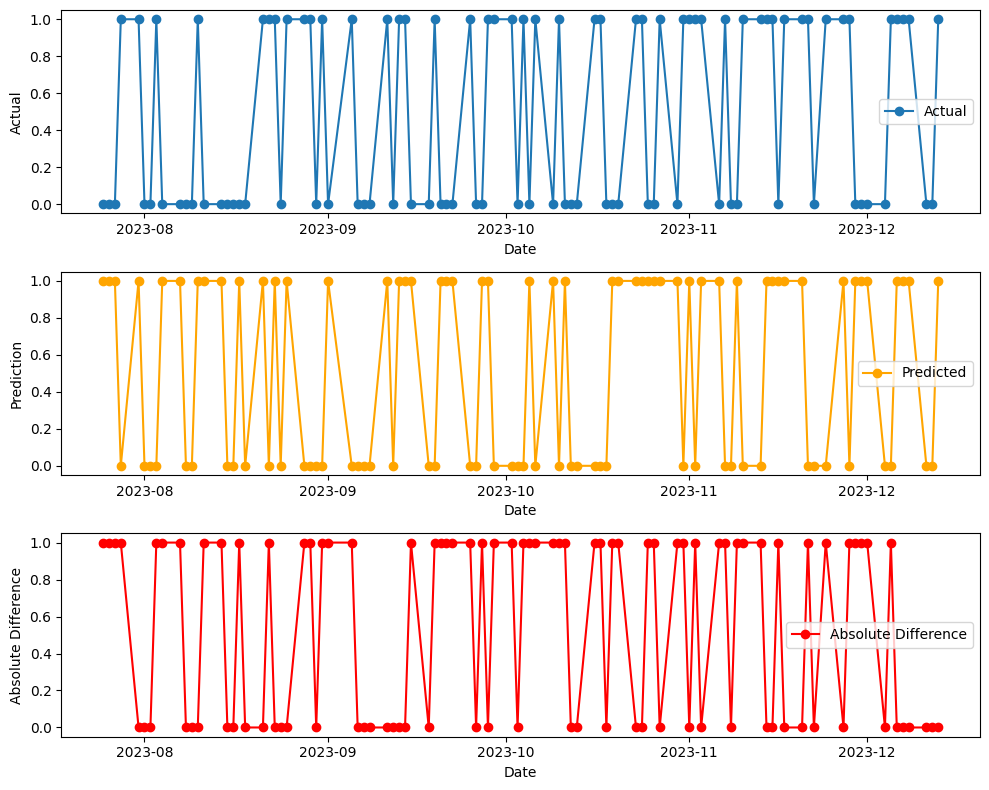

In [ ]:
# Visualize predictions for Stacking Classifier
plt.figure(figsize=(10, 8))

# Plot actual values
plt.subplot(3, 1, 1)
plt.plot(test.index, test["Target"], label="Actual", marker='o')
plt.xlabel("Date")
plt.ylabel("Actual")
plt.legend()

# Plot predicted values
plt.subplot(3, 1, 2)
plt.plot(test.index[:len(stacking_preds)], stacking_preds, label="Predicted", marker='o', color='orange')
plt.xlabel("Date")
plt.ylabel("Prediction")
plt.legend()

# Plot the absolute difference (error) between actual and predicted values
plt.subplot(3, 1, 3)
absolute_difference = abs(test["Target"].iloc[:len(stacking_preds)] - stacking_preds)
plt.plot(test.index[:len(stacking_preds)], absolute_difference, label="Absolute Difference", marker='o', color='red')
plt.xlabel("Date")
plt.ylabel("Absolute Difference")
plt.legend()

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [ ]:
i = 1000
step = 100

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
linear_model.fit(train[predictors], train["Target"])
preds = linear_model.predict(test[predictors])

In [ ]:
preds = stacking_model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0

In [ ]:
preds.head(10)

2014-06-20 04:00:00    0.0
2014-06-23 04:00:00    0.0
2014-06-24 04:00:00    0.0
2014-06-25 04:00:00    0.0
2014-06-26 04:00:00    0.0
2014-06-27 04:00:00    0.0
2014-06-30 04:00:00    0.0
2014-07-01 04:00:00    0.0
2014-07-02 04:00:00    0.0
2014-07-03 04:00:00    0.0
dtype: float64

In [ ]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    stacking_model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = stacking_model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

In [ ]:
predictions[0].head(50)

,Target,Predictions
2014-06-20 04:00:00,1.0,0.0
2014-06-23 04:00:00,1.0,0.0
2014-06-24 04:00:00,0.0,0.0
2014-06-25 04:00:00,1.0,0.0
2014-06-26 04:00:00,0.0,0.0
2014-06-27 04:00:00,1.0,0.0
2014-06-30 04:00:00,1.0,0.0
2014-07-01 04:00:00,0.0,0.0
2014-07-02 04:00:00,0.0,0.0
2014-07-03 04:00:00,0.0,0.0


In [ ]:
def backtest(data, stacking_model, predictors, start=1000, step=100):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        stacking_model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = stacking_model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [ ]:
predictions = backtest(data, stacking_model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    2222
1.0     166
Name: Predictions, dtype: int64

In [ ]:
predictions["Target"].value_counts()

1.0    1239
0.0    1149
Name: Target, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.608433734939759

In [ ]:
weekly_mean = data.rolling(7).mean()["Close"]
quarterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

In [ ]:
weekly_mean1 = data.rolling(7).mean()["Open"]
quarterly_mean1 = data.rolling(90).mean()["Open"]
annual_mean1 = data.rolling(365).mean()["Open"]

In [ ]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

In [ ]:
data["weekly_mean"] = weekly_mean / data["Close"]
data["quarterly_mean"] = quarterly_mean / data["Close"]
data["annual_mean"] = annual_mean / data["Close"]

In [ ]:
data["weekly_mean1"] = weekly_mean / data["Open"]
data["quarterly_mean1"] = quarterly_mean / data["Open"]
data["annual_mean1"] = annual_mean / data["Open"]

In [ ]:
data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

In [ ]:
data["annual_weekly_mean1"] = data["annual_mean1"] / data["weekly_mean1"]
data["annual_quarterly_mean1"] = data["annual_mean1"] / data["quarterly_mean1"]

In [ ]:
data["weekly_trend"] = weekly_trend

In [ ]:
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [ ]:
# data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_open_ratio"] = data["High"] / data["Open"]
data["low_open_ratio"] = data["Low"] / data["Open"]

In [ ]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean"]+["weekly_mean1", "quarterly_mean1", "annual_mean1", "annual_weekly_mean1", "annual_quarterly_mean1"]

In [ ]:
predictions = backtest(data.iloc[365:], stacking_model, full_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.4930555555555556

In [ ]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

0.0    1879
1.0     144
Name: Predictions, dtype: int64

<Axes: >

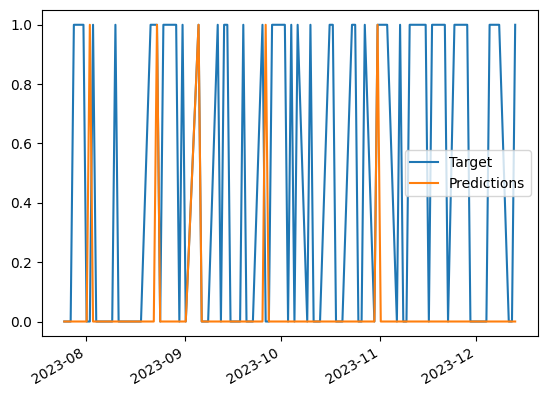

In [ ]:
# Look at trades we would have made in the last 100 days

predictions.iloc[-100:].plot()